## Results of


MODEL_1 and 3 <br>
CLASSIFIED WITH WORDS ONLY(NOT PHRASE)<br>
ngram = 1 



In [11]:
RANDOM_ST = 2019

target_names = ['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek',
           'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan',
           'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']

results = []
for clf, name in (
        (RidgeClassifier(tol=1e-2, solver="sag",random_state=RANDOM_ST), "Ridge Classifier"),
        (Perceptron(max_iter=50, tol=1e-3,random_state=RANDOM_ST), "Perceptron"),
        (PassiveAggressiveClassifier(max_iter=50, tol=1e-3,random_state=RANDOM_ST), "Passive-Aggressive"),
        (KNeighborsClassifier(n_neighbors=10), "kNN"),
        (RandomForestClassifier(n_estimators=100,random_state=RANDOM_ST), "Random forest")):
    print('=' * 80)
    print(name)
    results.append(benchmark(clf))
    
for penalty in ["l2", "l1"]:
    print('=' * 80)
    print("%s penalty" % penalty.upper())
    # Train Liblinear model
    results.append(benchmark(LinearSVC(penalty=penalty, dual=False, tol=1e-3)))

    # Train SGD model
    results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,penalty=penalty,random_state=RANDOM_ST)))

# Train SGD with Elastic Net penalty
print('=' * 80)
print("Elastic-Net penalty")
results.append(benchmark(SGDClassifier(alpha=.0001, max_iter=50,penalty="elasticnet",random_state=RANDOM_ST)))

# Train NearestCentroid without threshold
print('=' * 80)
print("NearestCentroid (aka Rocchio classifier)")
results.append(benchmark(NearestCentroid()))

# Train sparse Naive Bayes classifiers
print('=' * 80)
print("Naive Bayes")
results.append(benchmark(MultinomialNB(alpha=.01)))
results.append(benchmark(BernoulliNB(alpha=.01)))
results.append(benchmark(ComplementNB(alpha=.1)))

print('=' * 80)
print("LinearSVC with L1-based feature selection")
# The smaller C, the stronger the regularization.
# The more regularization, the more sparsity.
results.append(benchmark(Pipeline([('feature_selection', SelectFromModel(LinearSVC(penalty="l1", dual=False,tol=1e-3,random_state=RANDOM_ST))),
  ('classification', LinearSVC(penalty="l2",random_state=RANDOM_ST))])))

Ridge Classifier
________________________________________________________________________________
Training: 
RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=2019, solver='sag',
        tol=0.01)
train time: 2.678s
test time:  0.003s
accuracy:   0.764
dimensionality: 2767
density: 0.964583
classification report:
              precision    recall  f1-score   support

   brazilian       0.75      0.43      0.55        93
     british       0.74      0.30      0.43       161
cajun_creole       0.79      0.65      0.72       309
     chinese       0.72      0.88      0.80       535
    filipino       0.73      0.43      0.54       151
      french       0.61      0.66      0.63       529
       greek       0.82      0.68      0.74       235
      indian       0.83      0.89      0.86       601
       irish       0.69      0.29      0.40       133
     italian       0.76      0.91      0.83      1568
    jama

train time: 1.800s
test time:  0.003s
accuracy:   0.796
dimensionality: 2767
density: 0.964583
classification report:
              precision    recall  f1-score   support

   brazilian       0.77      0.59      0.67        93
     british       0.68      0.46      0.55       161
cajun_creole       0.76      0.72      0.74       309
     chinese       0.80      0.86      0.83       535
    filipino       0.76      0.62      0.68       151
      french       0.62      0.69      0.65       529
       greek       0.81      0.72      0.76       235
      indian       0.88      0.91      0.89       601
       irish       0.65      0.45      0.53       133
     italian       0.83      0.88      0.86      1568
    jamaican       0.82      0.71      0.76       105
    japanese       0.84      0.70      0.77       284
      korean       0.82      0.80      0.81       166
     mexican       0.90      0.93      0.91      1288
    moroccan       0.80      0.79      0.79       164
     russian     

/home/ncp/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)


train time: 2.461s
test time:  0.003s
accuracy:   0.781
dimensionality: 2767
density: 0.450126
classification report:
              precision    recall  f1-score   support

   brazilian       0.74      0.49      0.59        93
     british       0.69      0.27      0.39       161
cajun_creole       0.76      0.70      0.73       309
     chinese       0.78      0.88      0.83       535
    filipino       0.74      0.50      0.60       151
      french       0.65      0.63      0.64       529
       greek       0.82      0.71      0.76       235
      indian       0.83      0.91      0.87       601
       irish       0.72      0.32      0.45       133
     italian       0.79      0.91      0.85      1568
    jamaican       0.82      0.68      0.74       105
    japanese       0.82      0.68      0.74       284
      korean       0.79      0.72      0.75       166
     mexican       0.89      0.93      0.91      1288
    moroccan       0.80      0.76      0.78       164
     russian     

              precision    recall  f1-score   support

   brazilian       0.80      0.46      0.59        93
     british       0.54      0.32      0.40       161
cajun_creole       0.69      0.65      0.67       309
     chinese       0.73      0.88      0.80       535
    filipino       0.78      0.47      0.59       151
      french       0.57      0.56      0.57       529
       greek       0.86      0.54      0.67       235
      indian       0.84      0.89      0.86       601
       irish       0.71      0.28      0.40       133
     italian       0.75      0.88      0.81      1568
    jamaican       0.87      0.51      0.65       105
    japanese       0.89      0.64      0.74       284
      korean       0.86      0.63      0.73       166
     mexican       0.86      0.89      0.88      1288
    moroccan       0.81      0.66      0.73       164
     russian       0.65      0.32      0.42        98
 southern_us       0.58      0.75      0.65       864
     spanish       0.71    

In [19]:
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report

import xgboost as xgb

def Xgboost_():
    try:
        pipe = Pipeline([('classifier', xgb.XGBClassifier(random_state=RANDOM_ST))])
        hyperparameter_space = [{'classifier': [xgb.XGBClassifier()],
                                 'classifier__max_depth': [3, 4, 5],
                                 'classifier__n_estimators' : [350, 375, 400]}]
        grid = GridSearchCV(pipe, hyperparameter_space, cv=3)
        grid.fit(X_train, y_train)

        cuisine = ['brazilian', 'british', 'cajun_creole', 'chinese', 'filipino', 'french', 'greek',
                   'indian', 'irish', 'italian', 'jamaican', 'japanese', 'korean', 'mexican', 'moroccan',
                   'russian', 'southern_us', 'spanish', 'thai', 'vietnamese']

        print (classification_report(y_test, grid.predict(X_test), digits=4, target_names=cuisine))

        return print("Best parameters:\n{}\n".format(grid.best_params_), 
                     "Best score : {}\n".format(grid.best_score_),
                     "Test score : {}".format(grid.score(X_test, y_test)))
    except Exception as e:
        print(e)

In [20]:
Xgboost_()

              precision    recall  f1-score   support

   brazilian     0.8833    0.5699    0.6928        93
     british     0.7253    0.4099    0.5238       161
cajun_creole     0.8051    0.7087    0.7539       309
     chinese     0.7845    0.8505    0.8161       535
    filipino     0.7200    0.5960    0.6522       151
      french     0.6292    0.6673    0.6477       529
       greek     0.8492    0.7191    0.7788       235
      indian     0.8685    0.9118    0.8896       601
       irish     0.7234    0.5113    0.5991       133
     italian     0.7877    0.8992    0.8398      1568
    jamaican     0.8765    0.6762    0.7634       105
    japanese     0.8541    0.7007    0.7698       284
      korean     0.8296    0.6747    0.7442       166
     mexican     0.9123    0.9286    0.9204      1288
    moroccan     0.8732    0.7561    0.8105       164
     russian     0.6481    0.3571    0.4605        98
 southern_us     0.6931    0.8079    0.7461       864
     spanish     0.6944    

In [21]:
# classifier__max_depth': 5, 'classifier__n_estimators': 400 
# xgb  <- xgboost(xgbmat, max.depth = 25, eta = 0.3, nround = 200, objective = "multi:softmax", num_class = 20)
# https://www.kaggle.com/mohdatir/xgboost

results.append(benchmark(xgb.XGBClassifier(max_depth=5, n_estimators=400, random_state=RANDOM_ST)))

________________________________________________________________________________
Training: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=5, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=2019, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
train time: 610.343s
test time:  5.552s
accuracy:   0.795
classification report:
              precision    recall  f1-score   support

   brazilian       0.88      0.57      0.69        93
     british       0.73      0.41      0.52       161
cajun_creole       0.81      0.71      0.75       309
     chinese       0.78      0.85      0.82       535
    filipino       0.72      0.60      0.65       151
      french       0.63      0.67      0.65       529
       greek       0.85      0.72      0.78       235
   

In [22]:
# xgb  <- xgboost(xgbmat, max.depth = 25, 
# eta = 0.3, nround = 200, objective = "multi:softmax", num_class = 20)
# https://www.kaggle.com/mohdatir/xgboost

results.append(benchmark(xgb.XGBClassifier(max_depth=25, n_estimators=400, random_state=RANDOM_ST)))

# objective='binary:logistic'  objective issue : 
# https://stackoverflow.com/questions/39386966/multiclass-classification-in-xgboost-python


________________________________________________________________________________
Training: 
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=25, min_child_weight=1, missing=None, n_estimators=400,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=2019, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)
train time: 1962.474s
test time:  18.978s
accuracy:   0.791
classification report:
              precision    recall  f1-score   support

   brazilian       0.85      0.59      0.70        93
     british       0.72      0.43      0.54       161
cajun_creole       0.78      0.70      0.74       309
     chinese       0.80      0.87      0.83       535
    filipino       0.72      0.55      0.62       151
      french       0.62      0.64      0.63       529
       greek       0.81      0.71      0.75       235


In [93]:
print(results)

[('RidgeClassifier', 0.7637963544940289, 2.6782755851745605, 0.0029141902923583984), ('Perceptron', 0.7353865493400377, 0.3595554828643799, 0.0029103755950927734), ('PassiveAggressiveClassifier', 0.7654305468258956, 0.7742974758148193, 0.0028824806213378906), ('KNeighborsClassifier', 0.7532369578881207, 0.04176044464111328, 10.156664371490479), ('RandomForestClassifier', 0.7513513513513513, 40.75201678276062, 0.28439879417419434), ('LinearSVC', 0.7962287869264614, 1.8000664710998535, 0.002851247787475586), ('SGDClassifier', 0.781269641734758, 2.4607486724853516, 0.0028498172760009766), ('LinearSVC', 0.7948460087994972, 15.14245080947876, 0.002928018569946289), ('SGDClassifier', 0.7314896291640478, 5.592280864715576, 0.002790689468383789), ('SGDClassifier', 0.7751099937146448, 6.9946699142456055, 0.002885103225708008), ('NearestCentroid', 0.6173475801382778, 0.04611825942993164, 0.003404855728149414), ('MultinomialNB', 0.7405405405405405, 0.12585735321044922, 0.002727985382080078), ('Be

In [94]:
results = sorted(results,  key=lambda x: x[1], reverse=True)

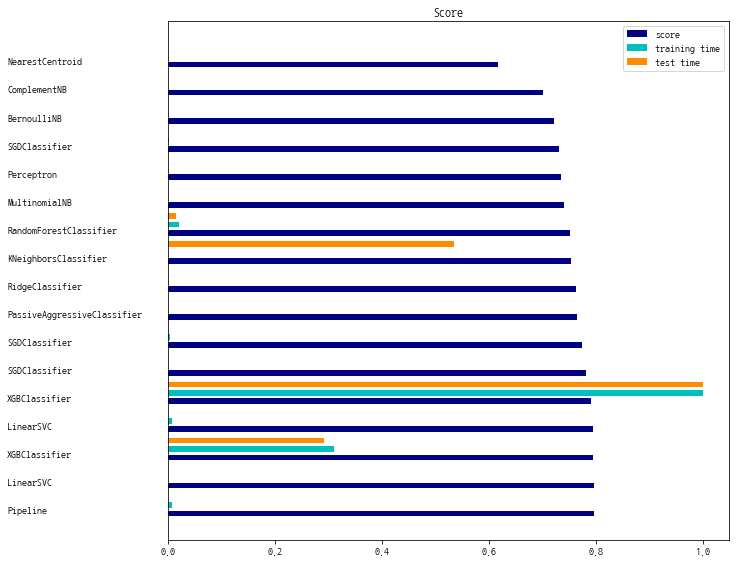

In [95]:
indices = np.arange(len(results))

results = [[x[i] for x in results] for i in range(4)]

clf_names, score, training_time, test_time = results
training_time = np.array(training_time) / np.max(training_time)
test_time = np.array(test_time) / np.max(test_time)

plt.figure(figsize=(12, 8))
plt.title("Score")
plt.barh(indices, score, .2, label="score", color='navy')
plt.barh(indices + .3, training_time, .2, label="training time",
         color='c')
plt.barh(indices + .6, test_time, .2, label="test time", color='darkorange')
plt.yticks(())
plt.legend(loc='best')
plt.subplots_adjust(left=.25)
plt.subplots_adjust(top=.95)
plt.subplots_adjust(bottom=.05)

for i, c in zip(indices, clf_names):
    plt.text(-.3, i, c)

plt.show()

In [96]:
print(np.average(score))

0.7536806300144193


In [97]:
print(np.max(score))

0.7967316153362665
